# Hypothesis Tests

In [1]:
import datetime
now = datetime.datetime.now()
print ("The last edit : ", now.strftime("%Y-%m-%d %H:%M:%S"))

The last edit :  2019-04-10 00:11:28


Statistics play an important role in our lives. It even becomes an imperative fundamental of any data scientist.
I don't know exactly why but today I like to resume my blog with a statistic post.

In [2]:
# First things first, let's import some libraries
from scipy import stats

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


## Scenario

Imagining on a hot day, you're going down the street and then stop at a watermelon store. The fruits there look so good that you immediately decide to buy some, not 2 or 3 but 15 watermelons 'cuz you have group of gluttons waiting for you at home. The shopkeeper avers that each ripe watermelon weighs approximately to 1.52 kilograms. Being ingenuous guys, we trust the man.  
At home, your instinct and curiosity tell you to put the fruits on the scale. You realize that most of them seem to be less than 1.52 kg. How to use statistics in this situation? 

In this post, we will use one sample T-test with p-value to shed light on it.

**Recap**

*1. The problem to solve.*

We want to check if the average weight of watermelons in the shop (population mean) is 1.52 kg.
    
    
*2. How to solve it?*

A straight forward solution is measuring all the watermelons in the shop. However, in fact it's a far-fetched idea. First, it's time consuming, and second no one makes sure that you can persuade the shopkeeper to let us take entire his fruits just for a trivial experiment, at least in his perspective. Hence, we come up with an alternative like this. 15 watermelons that we've bought can be used as a sample. From that we have the mean and std of the sample which in turn are used to calculate t-stats and p-value. 

## What is a T-distribution?

*T-distribution (Student distribution)*:  
 
     Similar to the Normal distribution with its bell shape, but has heavier tails. We use T-distribution to estimate population parameters when the sample size is small and/or when the population variance is unknown.
    
If the sample size is big, the T Distribution is close to Normal Distribution.

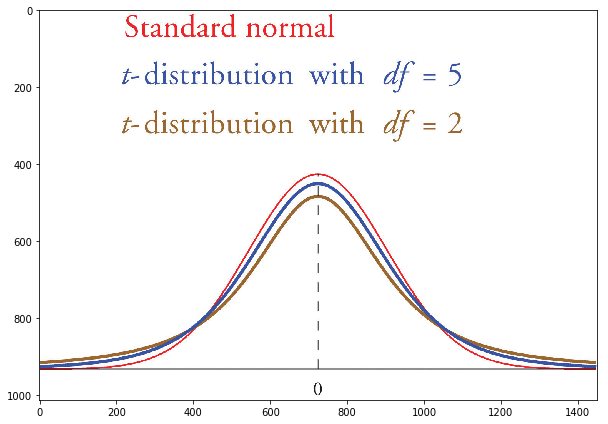

In [3]:
# demonstrate T-distribution & Normal distribution
plt.figure(figsize=(10, 15))

img = mpimg.imread('./image/t-distribution.jpg')
imgplot = plt.imshow(img)
plt.show()

## What are z-test and t-test?

### z-test

First, let's go with its simpler sibling  -  z-test:

z-test uses z-score to measure of how many standard deviations below or above the population mean a raw score is.

$$z \: score = \frac{m   -   \mu}{SE}; \: where \: SE = \frac{\sigma}{\sqrt{N}}$$ 


We use z-score when we have a normal distribution ($\sigma$ and $\mu$ are known), we want to check if **the mean of a group** is reliably different from **that of population**.

Just think z-score is the numbers of *"std"* between a value point $m$ (sample mean) and a value point $\mu$ (population mean). Note that *"std"* is the std of the *sample distribution*, it's also called *SE (standard error)*. Go to [18] for *SE* and *sample distribution*.


How people came up with the formula?

**Here's the idea.** Intuitively, we should have the distribution of sample distribution $X$ (in fact, it can easily calculated by the Central Limit Theorem, recall that the std of $X$ is $SE$). Doing this is reasonable because we want to compare the 2 *means* (the mean of the population $\mu$ and the mean of the sample $m$). 
Then, we put the *sample mean* $m$ into $X$, to see how likely it fit.
If $m$ fits so well (we can tell by calculating the z-score to see how far the sample mean $s$ to the population mean), we can not deny H0. Otherwise, we reject H0 because the sample is not likely to be drawn from the population. In other words, in the latter case, we can refuse H0 to accept that the sample is reliably different from the population.



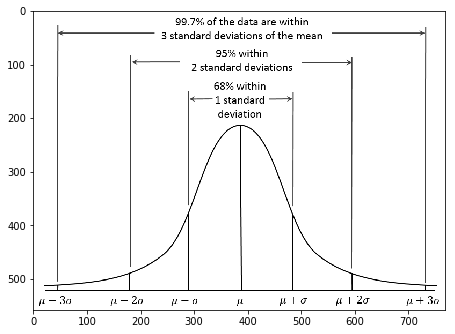

In [8]:
# demonstrate z-test
plt.figure(figsize=(7.6, 5.5))

img = mpimg.imread('./image/z_test.png')
imgplot = plt.imshow(img)
plt.show()

Let's take a quick look at 2 following examples to understand the idea of z-test.

** *ex1**. You have a test score of 190. The test has a mean ($\mu$) of 150 and a standard deviation ($\sigma$) of 25. Assuming a normal distribution, your z score would be?

ans: $z = \frac{190 - 150} {25/\sqrt{1}} = 1.6$.

It's worth noting that in this case, the sample size is 1 because only your test score in the sample. 

 
** *ex2**. In general, the mean height of women is 165 cm with a standard deviation of 5 cm. What is the probability of finding a random sample of 50 women with a mean height of 170 cm, assuming the heights are normally distributed?

ans:  $z = \frac{170 - 165} {5/\sqrt{50}} = 7.07$.

The sample mean is more than 7 standard deviations from the population mean. So it's not likely that the sample is from our population. We can reject H0.


Any questions so far? If not, here's a question for you. If $N$ (the sample size) is really big (let's say 1000)
, which means we have a huge $z$ too, regardless of  the difference between 2 means (e.g., "190 - 150" in the *ex1*). Due to big value of $z$, we reject H0. So, just pick a $N$ that large enough, we can ALWAYS reject H0 ???

Some thoughts about the question above. If the sample is from the population, so the high chance its mean is approximately the population mean. So, numerator goes to 0 in this case which in turn makes $z$ so close to 0 no matter how big the denominator is. It makes sense right? If the sample is from totally different population, it's likely that the more sample you get (i.e., the bigger sample size is), you can easily distinguish the sample from the population.
(assume difference of the 2 means doesn't change).


Okay, so far so good. But wait, why we need t-test when we already have z-test? 

Because of the limitations of the (exact) z test: 

+ Z-test just works when we know the variance of the population $\sigma^2$. In real life, the variance $\sigma^2$ is unknown hence we have no choice but estimating variance $\sigma^2$ from sample by calculating *unbiased sample variance* $s^2$ to perform t-test. It's also worth noting that $\sigma^2/s^2 \sim \chi^2_{n-1}$ ($n-1$ degrees of freedom) reminding us about the Chisquared distribution.

+ If the data is not from a normal distribution, we can not conduct the z-test. Central Limit Theorem might allow us to still make a t-test though. 




### t-test: 
t-test is a parametric procedure consisting of 3 types.



* Two samples T-test (Independent samples T-test): compares the means of 2 groups to see if they're reliably different from one another.
* Paired samples T-test: Test the mean of 1 group twice.
* One sample T-test: compares the mean of a sample to the mean of the population to see the difference. We're gonna use this one to solve the watermelon problem.

One important assumption when conducting a t-test is *bell-shaped distribution*. Go to [7] in the Reference section for more info.

For the details formula, go to [11]. In general, with one sample T-test, we have the same formula as with z-test, just little change as we use the sample std $s$ to estimate for the std of population $\sigma$.

With Two samples T-test, it's a bit more tricky:
$$t \: score = \frac{m_1 - m_2}{std \: of (m_1 - m_2)}$$


Here, $m_1$ and $m_2$ are the means of 2 groups that we want to compare. A big $t \: score$ indicates big difference between groups.



---

You might ask why the Normal Distribution is all over the place (at least in z-test and t-test). I suppose the Central Limit Theorem (CLT) has some credit on that. Normal Distribution and CLT are definitely worth their own article. I'll make a post for the topic.

## 1-tailed or 2-tailed T-test?

We only care if the watermelon is less than 1.52 kg or not, so 1-tailed 1-sample T-test seems to be a proper choice in this case.

Keep in mind that the hypothes is test can ONLY help us to reject H0, and period.

*alpha* (the significance level) in this case can be 0.05. If *p-value* is lower than *alpha*, we can reject the H0.



    H0: the average of watermelon's weight in the shop >= 1.52  (hypothesis on population, usually we want to reject it)

    H1: the average of watermelon's weight in the shop < 1.52 (alternative)


I'm not gonna go into the details about calculation part here. *stats* package should do all the job for us.

**Note**: the library calculates **2-tailed**, we have to divided *p_two_tailed* (result from the library) by 2 to get **p-value** for **1-tailed** test.

## Conduct the experiment

In [ ]:
# the weights of 15 watermelons that we bought.
weight = [1.55, 1.43, 1.48, 1.51, 1.58, 1.42, 1.52, 1.55, 1.48, 1.42, 1.48, 1.50, 1.50, 1.51, 1.46]

# the population mean that we need to check
popmean = 1.52

In [ ]:
# set alpha
alpha = 0.05

# calc t-stats, and p-value of two tailed test
t, p_two_tailed = stats.ttest_1samp(weight, popmean)

# calc p-value in 1-tailed test:
p_value = p_two_tailed/2
print("one-tailed T-test: t = {}, p_value = {}".format(t, p_value))

if p_value < alpha:
    print("Reject H0, the average of watermelon's weight in the shop < 1.52")
else:
    print("Not enough evidence, nothing the p-value can tell")

## The flaws of p-value

### p-value depends on sample size thus it's not consistent

    Let's say Alex takes 15 watermelons to conduct the experiment, whereas John goes with 30. p-values are gonna be different. Another example, we make an observation on the fairness of a coin. If Alex tosses the coin 100 times, while John does 1000 times, the two results would be different too.


### p-value does not give much info.
    
    All we can conclude is whether or not we can reject H0 (with some type-1 error). There's no way to know that H0 is true with certain level of probability. 
    
    If p-value's quite high, not much we can tell due to lack of evidence. Assuming you and your pal have a bet. Your friend believes that black swans are existing while you don't think so. You try to go on the safari to take a look on hundreds of swans. Even you don't find any of them is black, you can not deny your hypothesis nor neither accept the friend's. It's just not enough evidence yet. 
    
    
### appropriate p-value cutoff (alpha) is controversial

    0.05 is often used but in fact, it should depend on particular experiment.
    
 

## Take home note
### Tricks to remember

   **P is low, null must go** (if *p-value* is lower than *alpha*, reject H0)


### H0 (H null):

"null" means nothing. null hypothesis tends to say "no effect" or "nothing's new, nothing's going on". Maybe that's the reason why we want to reject H0 to get H1 (new knowledge). But it's not always the case. From time to time, you will realize that you need H0, for example to claim that the mean salary of male and female groups in your company is equal ???. 

###  p-value

p-value is the area (probability) that the extreme values can be picked (see the attached picture below)

* When *p-value* is greater than *alpha*, not enough evidence to conclude anything. 

* With a teeny tiny *p-value*, we can confidently reject H0. *p-value* is the probability that type-1 error can occur when we reject H0. 

###  alpha

alpha is the p-value cutoff which is chosen before doing the experiment. You can think it as a probability that we allow ourselves to make mistakes when rejecting H0 (type 1 error - we think we find something new, but it turns out not (false positive)).


In [ ]:
plt.figure(figsize=(10, 15))

img = mpimg.imread('./image/p_value.png')
imgplot = plt.imshow(img)
plt.show()

## REFERENCE

1. Hypothesis test (t-test): https://www.youtube.com/watch?v=Y3mGoW5w28c&t=5s
2. Understanding the p-value: https://www.youtube.com/watch?v=eyknGvncKLw&lc=Ughrepxc-NFljHgCoAEC.7-H0Z7-53__8sm9T4EGM0y
3. Frequentist vs Bayes Statistics: https://www.analyticsvidhya.com/blog/2016/06/bayesian-statistics-beginners-simple-english/
4. P-Value Problems (Crash Course Statistics): https://www.youtube.com/watch?v=PPD8lER8ju4&list=PL8dPuuaLjXtNM_Y-bUAhblSAdWRnmBUcr&index=23
5. One sample T-test: https://www.youtube.com/watch?v=VPd8DOL13Iw
6. Introduction to the One Sample t Test: https://www.youtube.com/watch?v=nU1AbbUsY4I
7. What is a t-test: https://www.youtube.com/watch?v=0Pd3dc1GcHc
8. What assumptions are made when conducting a t-test? https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp
9. Type 1 and type 2 errors (Crash Course Statistics): https://www.youtube.com/watch?v=WWagtGT1zH4&list=PL8dPuuaLjXtNM_Y-bUAhblSAdWRnmBUcr&index=24
10. t-test cho hai nhóm độc lập (T-test with R examples  in Vietnamese): https://www.youtube.com/watch?v=Yu9uK52i9OE
11. t-test by wiki: https://en.wikipedia.org/wiki/Student%27s_t-test
12. t-test and Central limit theorem: http://www.stats.ox.ac.uk/~winkel/stat2l1+1up.pdf
13. z-test wiki: https://en.wikipedia.org/wiki/Z-test
14. one sample z-test: https://www.youtube.com/watch?v=BWJRsY-G8u0
15. z-test with some examples: https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/
16. z-test and t-test slide: http://www.stats.ox.ac.uk/~winkel/stat2l1+1up.pdf
17. A discuss in Central Limit Theorem: https://stats.stackexchange.com/questions/204585/independent-samples-t-test-do-data-really-need-to-be-normally-distributed-for-l
18. Sample error and Sample distribution by wiki: https://en.wikipedia.org/wiki/Standard_error